# 04. 머신러닝 지도학습 모델 

## (1) 데이터 전처리 및 분류

#### (1-1) 데이터 전처리

In [1]:
# 'data_path' 를 입력받아서 pandas 로 csv 파일을 읽는 'load_csv' 함수 작성

import pandas as pd

def load_csv(data_path):
    data = pd.read_csv(data_path)
    return data

In [2]:
# 'load_csv' 함수로 'heart.csv' 파일 로드
data_path = "../src/heart.csv"
data = load_csv(data_path)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# 'data' type 확인
type(data)

pandas.core.frame.DataFrame

In [4]:
# 'data' shape 확인
data.shape

(1025, 14)

In [5]:
# 'data' 의 첫 10행 출력
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [6]:
# 'data' 의 끝 10행 출력
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
# 'data' columns 출력
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# 'data' 의 columns 중 'target' column 만 출력
data['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [9]:
# 'data' 의 'target' 값 중 고유값만 출력
data['target'].unique()

array([0, 1])

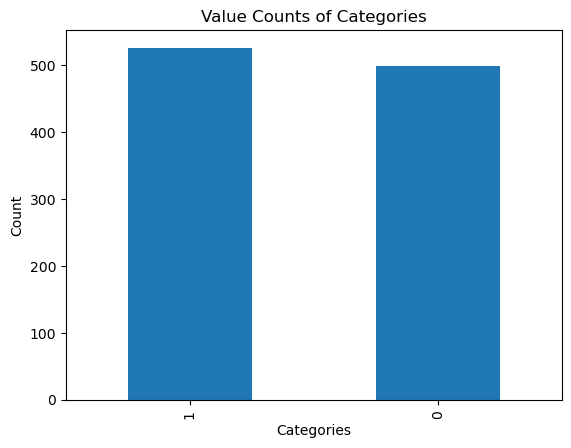

In [10]:
# 'data' 의 'target' column 의 고유값 별 행의 개수를 차트로 표시
import matplotlib.pyplot as plt

value_counts = data['target'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts of Categories')
plt.show()

In [11]:
# 'data' 의 정보 및 간단한 통계값 확인 및 의미해석
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [12]:
# 'data' 의 각 column 과 'target' column 간의 correlation 구하기
corr_matrix = data.corr()["target"]
corr_matrix

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

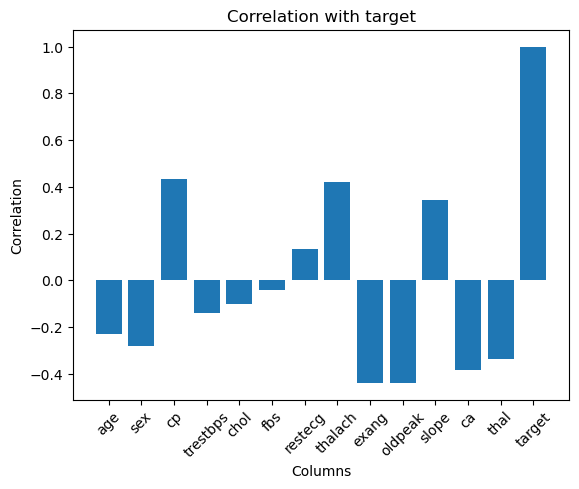

In [13]:
# 'data' 의 각 column 과 'target' column 간의 correlation 을 그래프로 출력
pivot_column = 'target'

plt.bar(corr_matrix.index, corr_matrix.values)
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title(f'Correlation with {pivot_column}')
plt.xticks(rotation=45)
plt.show()

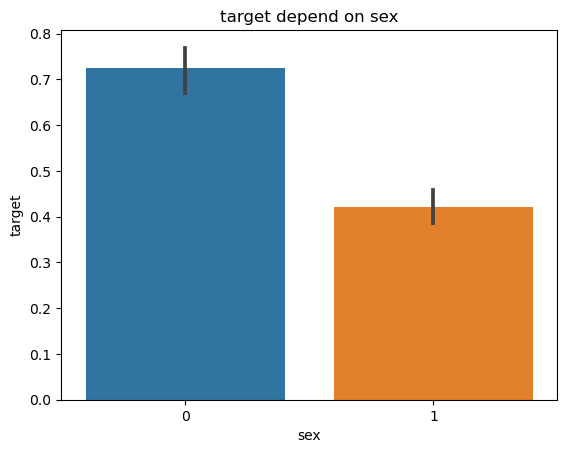

In [14]:
# python package 'seaborn'을 활용하여 'sex' column 을 x축으로, 'target' column 을 y축으로 하는 막대그래프(bar plot) 그리고 의미 파악

import seaborn as sns

sns.barplot(x='sex', y='target', data=data)
plt.xlabel('sex')
plt.ylabel('target')
plt.title('target depend on sex')
plt.show()

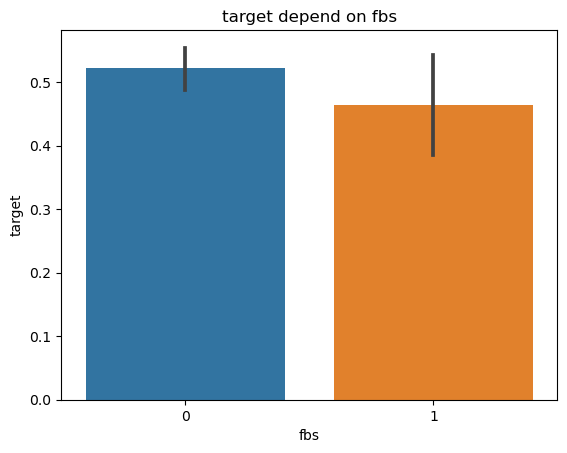

In [15]:
# 'fbs' column 을 x축으로, 'target' column 을 y축으로 하는 막대그래프(bar plot) 그리고 의미 파악
sns.barplot(x='fbs', y='target', data=data)
plt.xlabel('fbs')
plt.ylabel('target')
plt.title('target depend on fbs')
plt.show()

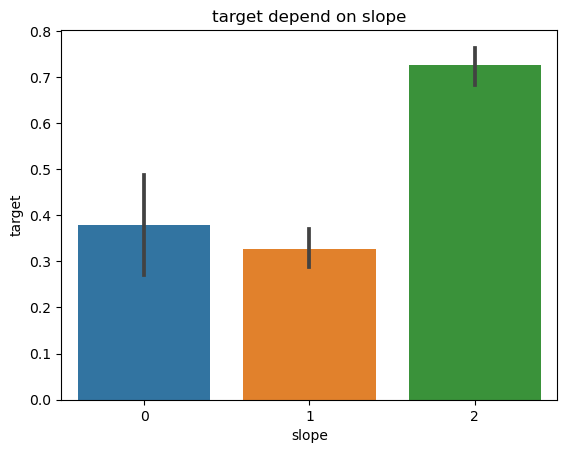

In [16]:
# 'fbs' column 을 x축으로, 'slope' column 을 y축으로 하는 막대그래프(bar plot) 그리고 의미 파악
sns.barplot(x='slope', y='target', data=data)
plt.xlabel('slope')
plt.ylabel('target')
plt.title('target depend on slope')
plt.show()

#### (1-2) 데이터 분류 (train / test)

In [17]:
# 'data' 에서 'target' column 을 제거한 나머지 columns 로 새로운 dataframe 'predictor_columns' 를 만들고, 'taregt' column 만 존재하는 새로운 dataframe 'target_column' 만들기
from sklearn.model_selection import train_test_split

predictor_columns = data.drop("target",axis=1)
target_column = data["target"]

print(predictor_columns)
print(target_column)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [18]:
# 'predictor_columns' 와 'target_column' 를 train 과 test 비율 8:2 로 데이터를 나누기
x_train, x_test, y_train, y_test = train_test_split(predictor_columns, target_column, test_size=0.20)
print(x_train, x_test, y_train, y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
369   51    1   2       110   175    0        1      123      0      0.6   
523   61    1   0       148   203    0        1      161      0      0.0   
235   64    1   3       170   227    0        0      155      0      0.6   
249   42    1   2       130   180    0        1      150      0      0.0   
842   58    1   2       112   230    0        0      165      0      2.5   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
695   35    1   0       126   282    0        0      156      1      0.0   
271   44    1   1       120   263    0        1      173      0      0.0   
17    54    1   0       124   266    0        0      109      1      2.2   
748   44    1   2       120   226    0        1      169      0      0.0   
997   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
369      2   0     2  
523      2   1     3  
235      1   0    

In [19]:
# 분리된 데이터 (x_train, x_test, y_train, y_test) 의 shape 확인
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [20]:
# 분리된 데이터 (x_train, x_test, y_train, y_test) 중 x_train 과 y_train 의 index 확인
indexes = (x_train.index == y_train.index)
indexes

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [21]:
# index 중 false 가 있는지 확인
any(False for value in indexes)

False

## 2. 모델 훈련

#### (2-1) K-Nearest Neighbors

In [22]:
# python 'sklearn' package 를 활용하여 'K-Nearest Neighbors' 모델 정의
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
# 'knn' 모델에 x_train 학습
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# 학습한 'knn' 모델에 x_test 테스트
y_test_pred = knn.predict(x_test)
y_test_pred

/Users/sangbuemseo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1])

## 3. 모델 검증

In [25]:
# x_test 결과와 y_test 비교
from sklearn.metrics import accuracy_score

score_knn = round(accuracy_score(y_test_pred, y_test)*100,2)
score_knn

86.34

## 4. 모델 시각화

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

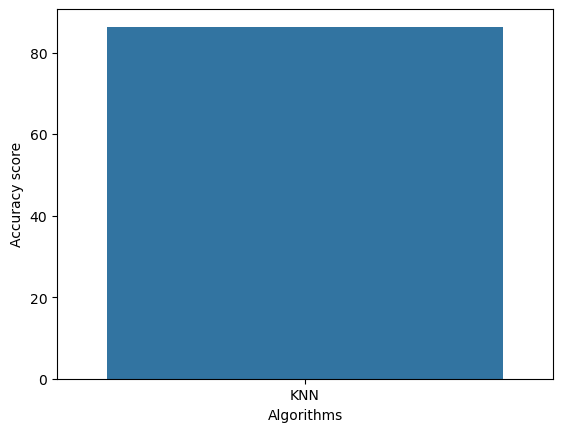

In [26]:
# 'seaborn' package 로 K-Nearest Neighbors' 모델의 정확도 막대그래프 그리기
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=['KNN'], y=[score_knn])

## 2+a. 다양한 모델 적용해보기 

In [27]:
# 모델 학습 결과를 저장할 dictionary 선언
scores = {}

#### (2-1) K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_test_pred = knn.predict(x_test)
score_knn = round(accuracy_score(y_test_pred, y_test)*100, 2)
scores['knn'] = score_knn
scores

/Users/sangbuemseo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'knn': 69.76}

#### (2-2) Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)
score_lr = round(accuracy_score(y_test_pred, y_test)*100, 2)
scores['lr'] = score_lr
scores

# save learned model

# load learned model

# predict on loaded model

/Users/sangbuemseo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'knn': 69.76, 'lr': 83.9}

#### (2-3) Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_test_pred = nb.predict(x_test)
score_nb = round(accuracy_score(y_test_pred, y_test)*100, 2)
scores['nb'] = score_nb
scores

{'knn': 69.76, 'lr': 83.9, 'nb': 80.98}

#### (2-4) SVM

In [31]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
y_test_pred = sv.predict(x_test)
score_sv = round(accuracy_score(y_test_pred, y_test)*100, 2)
scores['sv'] = score_sv
scores

{'knn': 69.76, 'lr': 83.9, 'nb': 80.98, 'sv': 80.98}

#### (2-5) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=50)
dt.fit(x_train, y_train)
y_test_pred = dt.predict(x_test)
score_dt = round(accuracy_score(y_test_pred, y_test)*100, 2)
scores['dt'] = score_dt
scores

{'knn': 69.76, 'lr': 83.9, 'nb': 80.98, 'sv': 80.98, 'dt': 96.59}

#### (2-6) Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=50)
rf.fit(x_train, y_train)
y_test_pred = rf.predict(x_test)
score_rf = round(accuracy_score(y_test_pred, y_test)*100, 2)
scores['rf'] = score_rf
scores

{'knn': 69.76, 'lr': 83.9, 'nb': 80.98, 'sv': 80.98, 'dt': 96.59, 'rf': 98.05}

#### (2-7) XGBoost

In [34]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
import xgboost as xgb

xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=50)
xgb.fit(x_train, y_train)
y_test_pred = xgb.predict(x_test)
score_xgb = round(accuracy_score(y_test_pred, y_test)*100,2)
scores['xgb'] = score_xgb
scores

{'knn': 69.76,
 'lr': 83.9,
 'nb': 80.98,
 'sv': 80.98,
 'dt': 96.59,
 'rf': 98.05,
 'xgb': 98.05}

#### (2-8) Neural Network

In [36]:
%pip install keras
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

dnn = Sequential()
dnn.add(Dense(11, activation='relu', input_dim=13))
dnn.add(Dense(1,activation='sigmoid'))
dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

dnn.fit(x_train, y_train, epochs=50)

y_test_pred = dnn.predict(x_test)
y_test_pred = [round(y[0]) for y in y_test_pred]

score_dnn = round(accuracy_score(y_test_pred, y_test)*100,2)
scores['dnn'] = score_dnn
scores

#### 모델 결과 비교

In [ ]:
# 모델 결과 비교
for model, acc in scores.items():
    print(model, acc)

## 4+a. 전체 모델 시각화

In [ ]:
# 'seaborn' package 를 활용하여 모델 결과 막대 그래프 (bar plot) 로 그리기
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=list(scores.keys()), y=list(scores.values()))